MC simulated samples of lambda and D

In [97]:
import uproot
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt

In [98]:
%pip install ROOT

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement ROOT (from versions: none)
ERROR: No matching distribution found for ROOT
Note: you may need to restart the kernel to use updated packages.


In [22]:
dir_path = "/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples"

ntuples = os.listdir(dir_path)
print(ntuples)

['CharmAnalysis.mc.ForcedDecay.Dplus.tree.root', 'CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root']


In [93]:
#processes ntunples given directory: returns trees 
def process_ntuple(ntuples):
    tree_list = []
    for ntuple in ntuples:
        file = uproot.open(dir_path + "/" + ntuple)
        tree = file["CharmAnalysis;1"]
        tree_list.append(tree)
    return tree_list

#event #, list of branches, and batch size: returns tuple of branches with data
def show(event, branches, batch_size):
    current_event = 0
    for array in process_ntuple(ntuples)[0].iterate(branches, step_size = batch_size):
        arrays = array[branches]
        if current_event == event:
            break
        current_event+=1
    return arrays


In [94]:
trees = process_ntuple(ntuples)
trees

[<TTree 'CharmAnalysis' (166 branches) at 0x154f177dba90>,
 <TTree 'CharmAnalysis' (166 branches) at 0x154f178005b0>]

In [95]:
show(0, ["DMesons_pt", "DMesons_m"], 100)

<Array [{DMesons_pt: [...], ...}, ..., {...}] type='100 * {DMesons_pt: var ...'>

In [32]:
file1 = uproot.open("/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples/CharmAnalysis.mc.ForcedDecay.Dplus.tree.root")
file2 = uproot.open("/global/cfs/cdirs/atlas/gottino/Charm/Analysis/run_batch_gup/ntuples/CharmAnalysis.mc.ForcedDecay.LabmdaC.tree.root")

In [85]:
type(DplusTree)

uproot.models.TTree.Model_TTree_v20

In [33]:
DplusTree = file1["CharmAnalysis;1"]
LambdaCTree = file2["CharmAnalysis;1"]

DplusTree["DMesons_pt"].array()

<Array [[5.74e+03, 5.74e+03], ..., [...]] type='20000000 * var * float32'>

In [36]:
DplusTree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
EventInfo_eventNu... | uint64_t                 | AsDtype('>u8')
EventInfo_RandomR... | uint32_t                 | AsDtype('>u4')
CharmEventInfo_To... | float                    | AsDtype('>f4')
CharmEventInfo_PV_X  | float                    | AsDtype('>f4')
CharmEventInfo_PV_Y  | float                    | AsDtype('>f4')
CharmEventInfo_PV_Z  | float                    | AsDtype('>f4')
CharmEventInfo_be... | float                    | AsDtype('>f4')
CharmEventInfo_be... | float                    | AsDtype('>f4')
CharmEventInfo_be... | float                    | AsDtype('>f4')
CharmEventInfo_be... | float                    | AsDtype('>f4')
CharmEventInfo_be... | float                    | AsDtype('>f4')
CharmEventInfo_be... | float                    | AsDtype('>f4')
DMesons_pt           | std::vector<float>       | AsJagged

In [52]:
key_list = []

#DMesons_pt, eta, phi
for i in range(12, 16):
    key_list.append(file1["CharmAnalysis;1"].keys()[i])
    
# #DMesons_daughterInfo__pt, eta, phi
# for i in range(46, 49):
#     key_list.append(file["CharmAnalysis;1"].keys()[i])

print("Keys: ", key_list)
print("List of Key Files: ", file.keys())

Keys:  ['DMesons_pt', 'DMesons_m', 'DMesons_eta', 'DMesons_phi']
List of Key Files:  ['cutflow;1', 'track_cflow;1', 'tight_track_cflow;1', 'CharmAnalysis;1']


In [54]:
data = {}
for key in key_list:
    data[key] = tree[key].array(library="np")
    
df = pd.DataFrame(data)

df

,DMesons_pt,DMesons_m,DMesons_eta,DMesons_phi
0,"[5735.7485, 5735.7485]","[1860.0809, 2207.8083]","[0.9682132, 0.9682132]","[1.2285283, 1.2285283]"
1,[10047.125],[1862.4176],[0.08182407],[2.7096815]
2,"[18993.742, 18993.742]","[1853.9062, 2398.887]","[-1.6619627, -1.6619627]","[-0.4605118, -0.4605118]"
3,[],[],[],[]
4,[],[],[],[]
...,...,...,...,...
19999995,[],[],[],[]
19999996,"[14818.177, 14818.177]","[1836.0997, 2165.724]","[-2.1479332, -2.1479332]","[0.47699, 0.47699]"
19999997,[],[],[],[]
19999998,[39381.43],[2210.8667],[1.5503558],[2.7627664]


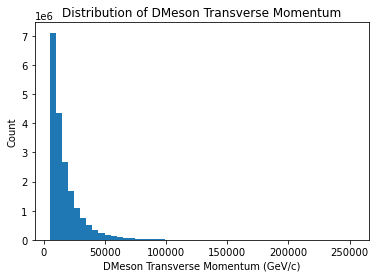

In [59]:
DMesons_pt = []
for pt in df['DMesons_pt']:
    if pt.size > 0:
        DMesons_pt.extend(pt)

# Plot the histogram
plt.hist(DMesons_pt, bins=50)
plt.xlabel('DMeson Transverse Momentum (GeV/c)')
plt.ylabel('Count')
plt.title('Distribution of DMeson Transverse Momentum')
plt.show()